In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import numpy as np
import pandas as pd


In [4]:
%matplotlib inline
import matplotlib 

In [5]:
url = "http://books.toscrape.com/"

# TODO: Use `requests` to do an HTTP request to fetch data located at that URL
# TODO: Create a `BeautifulSoup` instance with that data

In [9]:
response = requests.get(url)    

In [10]:
soup = BeautifulSoup(response.content, "html.parser")

In [19]:
books_html = soup.find_all("article",class_='product_pod')

In [20]:
books_html

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>, <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thum

In [18]:
len(books_html)

20

## Parsing _one_ book

In [21]:
books_html[0]

<article class="product_pod">
<div class="image_container">
<a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
</div>
<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>
<h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
<div class="product_price">
<p class="price_color">£51.77</p>
<p class="instock availability">
<i class="icon-ok"></i>
    
        In stock
    
</p>
<form>
<button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
</form>
</div>
</article>

In [31]:
book_title = books_html[0].find("h3").find("a")
book_title

<a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a>

In [36]:
book_title = books_html[0].find("h3").find("a").attrs["title"]
book_title

'A Light in the Attic'

In [50]:
book_price = float(books_html[0].find("p", class_="price_color").string[1:])
book_price

51.77

In [55]:
book_stars_html = books_html[0].find("p").attrs["class"][1]
book_stars_html 

'Three'

In [67]:
def parse_rating(rating_classes):
    if 'One' in rating_classes: 
        return 1
    elif 'Two' in rating_classes: 
        return 2
    elif 'Three' in rating_classes: 
        return 3
    elif 'Four' in rating_classes: 
        return 4
    elif 'Five' in rating_classes: 
        return 5
    else : 
        return 0

book_stars_html = parse_rating(books_html[0].find("p").attrs["class"][1])


## Parsing _all_ books

In [73]:
books_dict = {"Title" : [], "Price" : [] , "Rating" : []}

for book_html in books_html: 
    title = (book_html.find("h3").find("a").attrs["title"])
    price = (book_html.find("p", class_="price_color").string[1:])
    rating = (parse_rating(book_html.find("p").attrs["class"][1]))
    books_dict["Title"].append(title)
    books_dict["Price"].append(price)
    books_dict["Rating"].append(rating) 
    
books_df = pd.DataFrame.from_dict(books_dict)
len(books_df)

20

In [74]:
books_df

,Title,Price,Rating
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


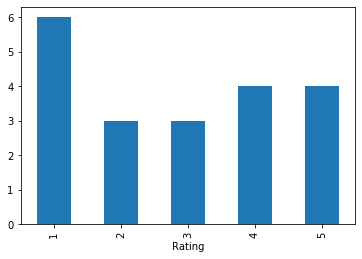

In [79]:
books_df.groupby('Rating').count()["Title"].plot(kind = "bar")

##Going through -all- the pages of the catalogue

In [80]:
## Going through _all_ the pages of the catalogue

## Going through _all_ the pages of the catalogue

In [81]:
url = f"http://books.toscrape.com/catalogue/page-2.html"

In [97]:
MAX_PAGE = 3
all_books_dict = {"Title" : [], "Price" : [] , "Rating" : []}
for page in range(1, MAX_PAGE+1):
    url = f"http://books.toscrape.com/catalogue/page-{page}.html" 
    response = requests.get(url)  
    soup = BeautifulSoup(response.content, "html.parser")
    books_html = soup.find_all("article",class_='product_pod')
  
    for book_html in books_html: 
        title = (book_html.find("h3").find("a").attrs["title"])
        price = (book_html.find("p", class_="price_color").string[1:])
        rating = (parse_rating(book_html.find("p").attrs["class"][1]))
        all_books_dict["Title"].append(title)
        all_books_dict["Price"].append(price)
        all_books_dict["Rating"].append(rating) 
    
all_books_df = pd.DataFrame.from_dict(all_books_dict)
print("Done!")

Done!


In [98]:
len(all_books_df)

60

In [99]:
all_books_df.tail()

,Title,Price,Rating
55,The Torch Is Passed: A Harding Family Story,19.09,1
56,The Secret of Dreadwillow Carse,56.13,1
57,The Pioneer Woman Cooks: Dinnertime: Comfort C...,56.41,1
58,The Past Never Ends,56.50,4
59,The Natural History of Us (The Fine Art of Pre...,45.22,3


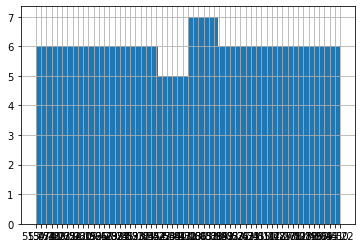

In [100]:
all_books_df["Price"].hist()

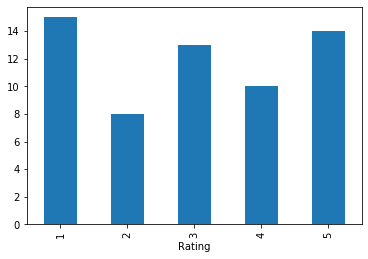

In [101]:
all_books_df.groupby('Rating').count()['Title'].plot(kind= "bar")

In [105]:
all_books_df.to_csv('books.csv')